In [1]:
%matplotlib inline

In [2]:
from skyfield.api import Loader
load = Loader('./data')

In [3]:
from skyfield import api

In [4]:
from skyfield import almanac

In [5]:
manhattan_beach = api.Topos('33.881519 N', '118.388177 W')

In [6]:
ts = load.timescale()

In [7]:
ephemeris = load('de421.bsp')

In [8]:
t0 = ts.utc(2019, 1, 1)
t1 = ts.utc(2019, 12, 31)
t, y = almanac.find_discrete(t0, t1, almanac.seasons(ephemeris))

for yi, ti in zip(y, t):
    print(yi, almanac.SEASON_EVENTS[yi], ti.utc_iso(' '))

0 Vernal Equinox 2019-03-20 21:58:26Z
1 Summer Solstice 2019-06-21 15:54:15Z
2 Autumnal Equinox 2019-09-23 07:50:11Z
3 Winter Solstice 2019-12-22 04:19:26Z


In [9]:
t0 = ts.utc(2019, 5, 25, 4)
t1 = ts.utc(2019, 5, 26, 4)
t, y = almanac.find_discrete(t0, t1, almanac.sunrise_sunset(ephemeris, manhattan_beach))

print(t.utc_iso())
print(y)

['2019-05-25T12:46:26Z', '2019-05-26T02:54:55Z']
[ True False]


In [10]:
t0 = ts.utc(2019, 5, 1)
t1 = ts.utc(2019, 5, 31)
t, y = almanac.find_discrete(t0, t1, almanac.moon_phases(ephemeris))

print(t.utc_iso())
print(y)
print([ almanac.MOON_PHASES[yi] for yi in y ])

['2019-05-04T22:45:30Z', '2019-05-12T01:12:14Z', '2019-05-18T21:11:21Z', '2019-05-26T16:33:35Z']
[0 1 2 3]
['New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']


In [11]:
from skyfield.api import Star
from skyfield.data import hipparcos

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)
    
barnards_star = Star.from_dataframe(df.loc[87937])

In [12]:
earth = ephemeris['earth']
t = ts.now()
astrometric = earth.at(t).observe(barnards_star)
ra, dec, distance = astrometric.radec()
print(ra, dec, distance)

17h 57m 47.46s +04deg 44' 56.7" 2.06265e+14 au


In [13]:
df.head()

,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
1,9.10,0.000912,1.089013,3.54,-5.20,-1.88,0.000061,1991.25
2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,0.000253,1991.25
3,6.61,0.005008,38.859286,2.81,5.24,-2.91,0.000334,1991.25
4,8.06,0.008382,-51.893546,7.75,62.85,0.16,0.000559,1991.25
5,8.55,0.009965,-40.591224,2.87,2.53,9.07,0.000664,1991.25


In [14]:
bright = df[df['magnitude'] <= 5]

In [15]:
len(bright)

1627

In [16]:
bright_stars = Star.from_dataframe(bright)

In [17]:
t = ts.now()
astrometric = earth.at(t).observe(bright_stars)
ra, dec, distance = astrometric.radec()

[]

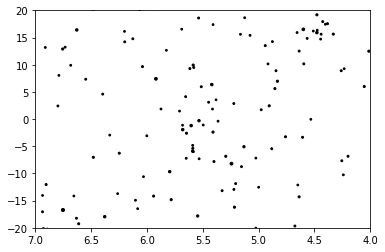

In [18]:
from matplotlib import pyplot as plt
plt.scatter(ra.hours, dec.degrees, 8 - bright['magnitude'], 'k')
plt.xlim(7.0, 4.0)
plt.ylim(-20, 20)
plt.plot()